*Created by*: 
**Lok Hin Wu** 
**44572492**
# ACST890 S119 THQ2
## Question 2
### Part A

Load required packages pandas and numpy

In [1]:
import pandas as pd
import numpy as np

In [2]:
data = {'Output, Q':[80,150,135,165,95,130,110],
       'Labour, L':[60,100,100,120,70,90,80],
       'Capital, K':[50,100,80,100,60,80,70]}
df = pd.DataFrame(data, index = ['B','C','D','E','F','G','H'])

In [3]:
print(df)

   Output, Q  Labour, L  Capital, K
B         80         60          50
C        150        100         100
D        135        100          80
E        165        120         100
F         95         70          60
G        130         90          80
H        110         80          70


Print mean of each variable

In [4]:
df.mean()

Output, Q     123.571429
Labour, L      88.571429
Capital, K     77.142857
dtype: float64

Print variance of each variable

In [5]:
df.var()

Output, Q     914.285714
Labour, L     414.285714
Capital, K    357.142857
dtype: float64

Print standard deviation of each variable

In [6]:
df.std()

Output, Q     30.237158
Labour, L     20.354010
Capital, K    18.898224
dtype: float64

Print median of each variable

In [7]:
df.median()

Output, Q     130.0
Labour, L      90.0
Capital, K     80.0
dtype: float64

---

### Part B

In [8]:
import seaborn as sns

In [9]:
x1 = df['Output, Q']
x2 = df['Labour, L']

Text(0, 0.5, 'density')

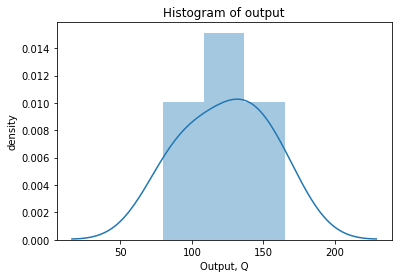

In [10]:
ax1 = sns.distplot(x1)
ax1.set_title('Histogram of output')
ax1.set_ylabel('density')

The above shows the histogram of variable Output, Q

Text(0, 0.5, 'density')

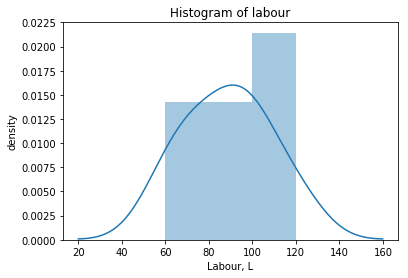

In [11]:
ax2 = sns.distplot(x2)
ax2.set_title('Histogram of labour')
ax2.set_ylabel('density')

The above shows the histogram of variable Labour, L

---

### Part C

In [12]:
log_df = np.log(df)
log_df = log_df.rename(
    columns = {'Output, Q': 'log(Output, Q)', 'Labour, L': 'log(Labour, L)', 'Capital, K': 'log(Capital, K)'})

In [13]:
print(log_df)

   log(Output, Q)  log(Labour, L)  log(Capital, K)
B        4.382027        4.094345         3.912023
C        5.010635        4.605170         4.605170
D        4.905275        4.605170         4.382027
E        5.105945        4.787492         4.605170
F        4.553877        4.248495         4.094345
G        4.867534        4.499810         4.382027
H        4.700480        4.382027         4.248495


The above shows the log values of the dataset

---

### Part D

In [14]:
x = log_df[['log(Labour, L)','log(Capital, K)']]
y = log_df['log(Output, Q)']

In [15]:
import statsmodels.api as sm

In [16]:
xx = sm.add_constant(x)
mdl1 = sm.OLS(y, xx).fit()

C:\Users\HUGO\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [17]:
print(mdl1.summary())

                            OLS Regression Results                            
Dep. Variable:         log(Output, Q)   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                     958.4
Date:                Wed, 15 May 2019   Prob (F-statistic):           4.34e-06
Time:                        22:58:55   Log-Likelihood:                 21.712
No. Observations:                   7   AIC:                            -37.42
Df Residuals:                       4   BIC:                            -37.59
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.1462      0.114     

C:\Users\HUGO\Anaconda3\lib\site-packages\statsmodels\stats\stattools.py:72: ValueWarning: omni_normtest is not valid with less than 8 observations; 7 samples were given.
  "samples were given." % int(n), ValueWarning)


The above shows the multiple linear regression result of the desired model, which is ln(Q)=ln(A)+alpha*ln(L)+beta*ln(K).
To obtain our original model, taking exponential power to both sides will get things done.
Hence our final estimate of the model is: Q=exp(0.1462)*exp(0.5484)^[alpha]*exp(0.5087)^[beta].
The p-values also indicate that the coefficient of ln(L) and ln(K) is significant but not for the constant ln(A), 
at 5% level of significance

In [18]:
print(mdl1.params)

const              0.146233
log(Labour, L)     0.548427
log(Capital, K)    0.508741
dtype: float64


In [19]:
alpha = mdl1.params[1]
beta = mdl1.params[2]

In [20]:
print('\u03b1+\u03b2 =', alpha+beta)

α+β = 1.0571684057723623


From above it can be seen
that the sum of values alpha and beta is equal to 1.0572, which is not 1. Hence the model may not be homogenoeous of degree 1

---

### Part E

In [21]:
import matplotlib.pyplot as plt
residual = y-mdl1.predict(xx)
index = ['B','C','D','E','F','G','H']

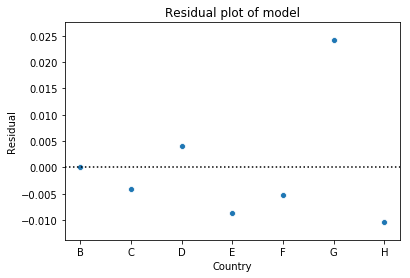

In [22]:
ax = sns.scatterplot(x=index, y=residual)
ax.set_title('Residual plot of model')
ax.set_ylabel('Residual')
ax.set_xlabel('Country')
plt.axhline(0, color='black', ls='dotted')

---

### Part F

In [23]:
print('Adjusted R\u00b2 for the model is:', mdl1.rsquared_adj)

Adjusted R² for the model is: 0.9968763418198051
